In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("train.csv")

# Remove the "PassengerId" column
df = df.drop("PassengerId", axis=1)


Above we loaded the space titanic dataset 

Here is the link: https://www.kaggle.com/competitions/spaceship-titanic


we will first check if there are celles with no elements, then drop the rows with any empty cells and then check the final result

In [2]:
import pandas as pd


# Check for null elements before removing
null_elements_before = df.isnull().sum().sum()
print("Number of null elements before:", null_elements_before)

# Remove rows with null elements
df = df.dropna()

# Check for null elements after removing
null_elements_after = df.isnull().sum().sum()
print("Number of null elements after:", null_elements_after)

print(df.head())

Number of null elements before: 2324
Number of null elements after: 0
  HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  
0        0.0           0.0     0.0     0.0    Maham Ofracculy        False  
1        9.0          25.0   549.0    44.0       Juanna Vines         True  
2     3576.0           0.0  6715.0    49.0      Altark Susent        False  
3     1283.0         371.0  3329.0   193.0       Solam Susent        False  
4       70.0         151.0   565.0     2.0  Willy Santantines         True  


Studying the data, I noticed that The cell "Name" and "Cabin" which signifies the cabin number is not significant for the prediction of whether someone will be or wont be left out in another dimension, so i decided to remove them, you can do more Exploratory data analysis, plot some of the features with outputs to see whether one is related to the other 

In [3]:
df = df.drop(["Name", "Cabin"], axis = 1)
print(df.head())

  HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  
0           0.0     0.0     0.0        False  
1          25.0   549.0    44.0         True  
2           0.0  6715.0    49.0        False  
3         371.0  3329.0   193.0        False  
4         151.0   565.0     2.0         True  


I was trying to figure out the nature of the data in the "homePlanet" and "destination" columns

In [4]:
import pandas as pd



# Unique values in "HomePlanet"
n_unique_homeplanets = df["HomePlanet"].nunique()
print("Unique values in 'HomePlanet':", n_unique_homeplanets)

# Unique values in "Destination"
n_unique_destinations = df["Destination"].nunique()
print("Unique values in 'Destination':", n_unique_destinations)

Unique values in 'HomePlanet': 3
Unique values in 'Destination': 3


converted the columns with categorical data into object and normalized numeric data

In [5]:
from sklearn.preprocessing import MinMaxScaler



# 2. Convert to categorical columns
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
df[categorical_cols] = df[categorical_cols].astype("category")

# 3. Normalize numerical columns
numerical_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



# Now you have the modified dataframe
print(df.head())

  HomePlanet CryoSleep  Destination       Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  0.493671  False     0.000000   0.000000   
1      Earth     False  TRAPPIST-1e  0.303797  False     0.010988   0.000302   
2     Europa     False  TRAPPIST-1e  0.734177   True     0.004335   0.119948   
3     Europa     False  TRAPPIST-1e  0.417722  False     0.000000   0.043035   
4      Earth     False  TRAPPIST-1e  0.202532  False     0.030544   0.002348   

   ShoppingMall       Spa    VRDeck  Transported  
0      0.000000  0.000000  0.000000        False  
1      0.002040  0.024500  0.002164         True  
2      0.000000  0.299670  0.002410        False  
3      0.030278  0.148563  0.009491        False  
4      0.012324  0.025214  0.000098         True  


converted the cetgorical data into one-hot-encoding data

In [6]:
X = df.drop("Transported", axis=1)
y = df["Transported"]

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Now the categorical columns are one-hot encoded
print(X.head())

        Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0  0.493671     0.000000   0.000000      0.000000  0.000000  0.000000   
1  0.303797     0.010988   0.000302      0.002040  0.024500  0.002164   
2  0.734177     0.004335   0.119948      0.000000  0.299670  0.002410   
3  0.417722     0.000000   0.043035      0.030278  0.148563  0.009491   
4  0.202532     0.030544   0.002348      0.012324  0.025214  0.000098   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_False  \
0                 0                  1                0                1   
1                 1                  0                0                1   
2                 0                  1                0                1   
3                 0                  1                0                1   
4                 1                  0                0                1   

   CryoSleep_True  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0               0              

since this is a cetgorical problem, i applied lgoistic regression and started vewiing the accuracy and loss

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

X = df.drop("Transported", axis=1)
y = df["Transported"]

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on both train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

Train accuracy: 0.7664647993943982
Test accuracy: 0.7753403933434191
Train log loss: 8.417461824786255
Test log loss: 8.0975529928652


finally i compared the train and test accuracies, showing that the model is not overfit or underfit, you may perform more experiments to get better accuracies with your data

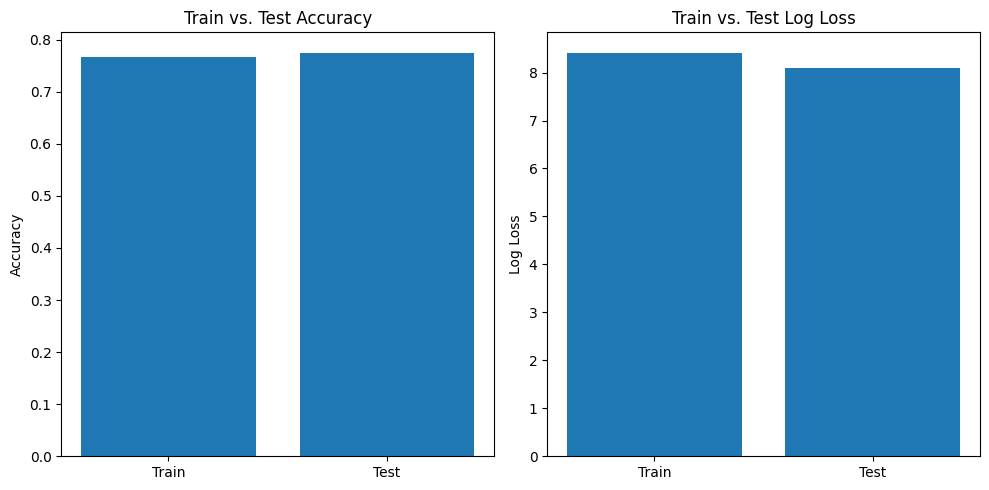

In [8]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()